In [1]:
import pandas as pd
import numpy as np         
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


In [2]:
train_df=pd.read_csv("C:\\Users\\ACER\\Downloads\\train_ctrUa4K.csv")
test_df=pd.read_csv("C:\\Users\\ACER\\Downloads\\test_lAUu6dG.csv")
train_original=train_df.copy()
test_original=test_df.copy()

In [3]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
train_df.shape

(614, 13)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
train_df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [13]:
duplicated_rows = train_df.duplicated()

In [15]:
duplicated_rows.sum()

0

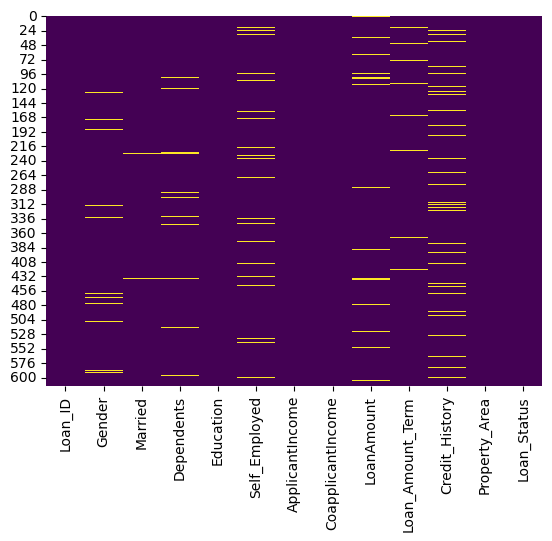

In [17]:
sns.heatmap(train_df.isna(),cmap='viridis',cbar=False)
plt.show()

In [18]:
train_df.isna().sum()  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train_df.isna().sum()/train_df.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [23]:
num_df = train_df.select_dtypes(include="number")
cat_df = train_df.select_dtypes(include="object_")

In [24]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns are
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


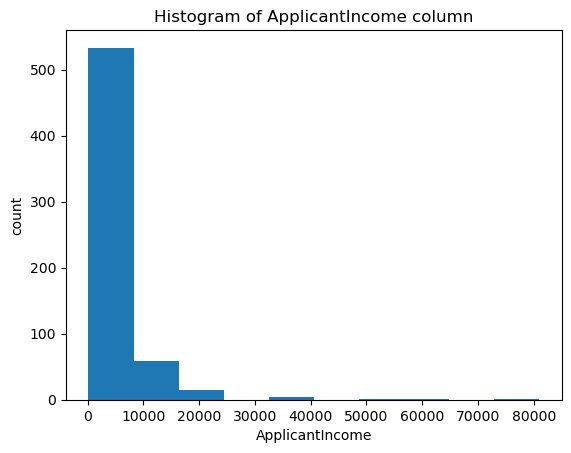

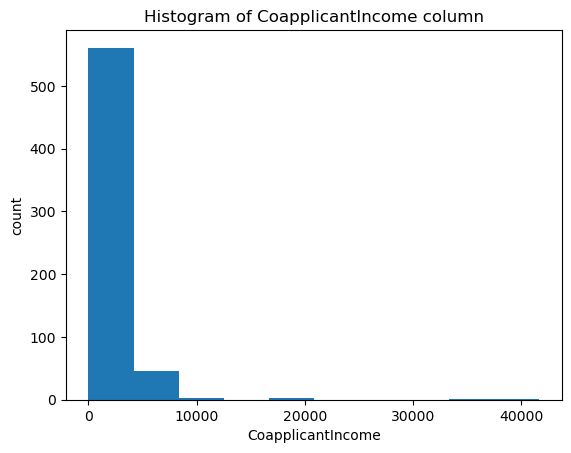

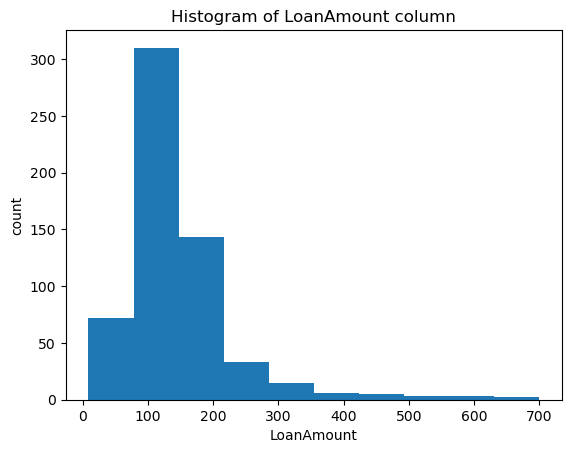

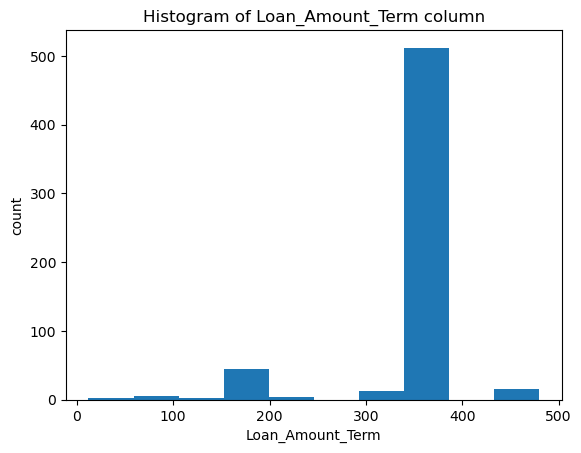

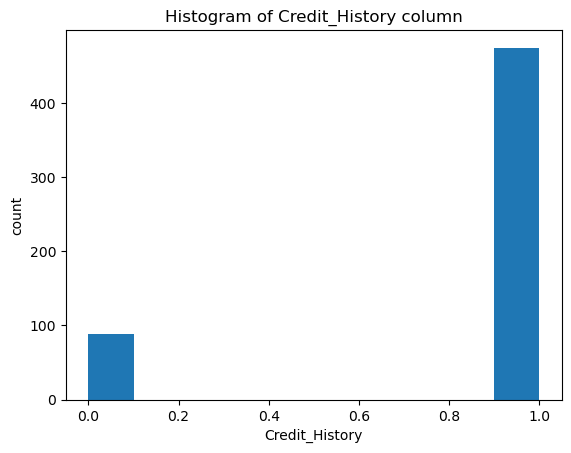

In [27]:
for col in num_cols:
  plt.hist(num_df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [28]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [31]:
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [33]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [35]:
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [37]:
train_df = pd.concat([num_df, cat_df], axis=1)

In [39]:
train_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
print(train_df["Dependents"].unique())

['0' '1' '2' '3+']


In [43]:
train_df["Dependents"].replace('3+',3,inplace=True)
train_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
609,2900,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y
610,4106,0.0,40.0,180.0,1.0,LP002979,Male,Yes,3,Graduate,No,Rural,Y
611,8072,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,7583,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y
613,4583,0.0,133.0,360.0,0.0,LP002990,Female,No,0,Graduate,Yes,Semiurban,N


In [45]:
dup_cols = train_df.columns.duplicated()

In [47]:
dup_cols.sum()


0

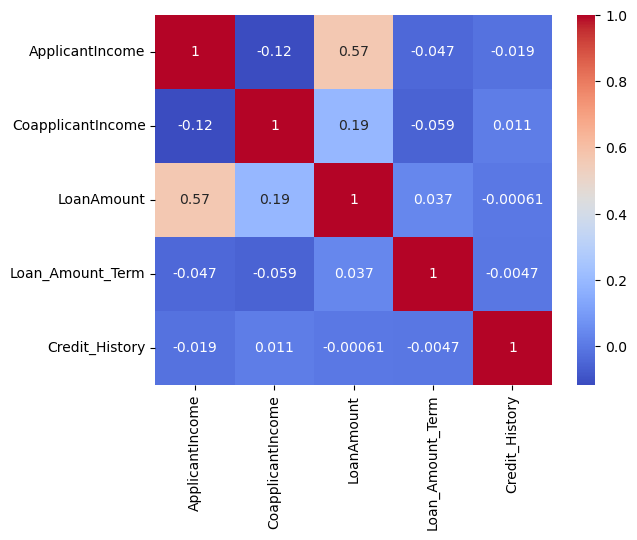

In [49]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

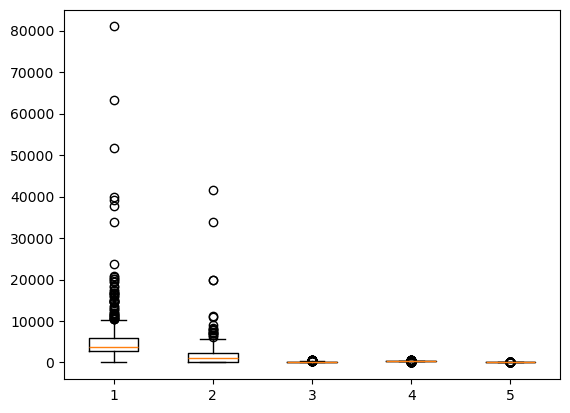

In [51]:
plt.boxplot(num_df)
plt.show()

In [53]:
def remove_outliers(train_df, column_name):
    q1 = train_df[column_name].quantile(0.25)
    q3 = train_df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    train_df[column_name] = train_df[column_name].clip(upper=upper_bound)
    train_df[column_name] = train_df[column_name].clip(lower=lower_bound)
    return train_df[column_name]

In [55]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

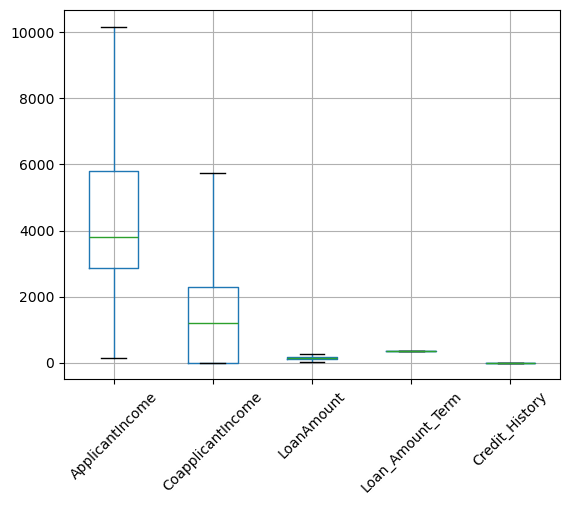

In [57]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [59]:
# Encoding 
train_df=pd.get_dummies(train_df,columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'],drop_first=True)
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,LP001002,0,Y,True,False,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,LP001003,1,N,True,True,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,LP001005,0,Y,True,True,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,LP001006,0,Y,True,True,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,LP001008,0,Y,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,LP002978,0,Y,False,False,False,False,False,False
610,4106,0.0,40.0,180.0,1.0,LP002979,3,Y,True,True,False,False,False,False
611,8072,240.0,253.0,360.0,1.0,LP002983,1,Y,True,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,LP002984,2,Y,True,True,False,False,False,True


In [60]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [63]:
std_scaler = StandardScaler()
train_df["LoanAmount"] = std_scaler.fit_transform(train_df[["LoanAmount"]])
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,-0.211241,360.0,1.0,LP001002,0,Y,True,False,False,False,False,True
1,4583,1508.0,-0.211241,360.0,1.0,LP001003,1,N,True,True,False,False,False,False
2,3000,0.0,-0.948996,360.0,1.0,LP001005,0,Y,True,True,False,True,False,True
3,2583,2358.0,-0.306435,360.0,1.0,LP001006,0,Y,True,True,True,False,False,True
4,6000,0.0,-0.056551,360.0,1.0,LP001008,0,Y,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,-0.889500,360.0,1.0,LP002978,0,Y,False,False,False,False,False,False
610,4106,0.0,-1.258378,180.0,1.0,LP002979,3,Y,True,True,False,False,False,False
611,8072,240.0,1.276168,360.0,1.0,LP002983,1,Y,True,True,False,False,False,True
612,7583,0.0,0.490816,360.0,1.0,LP002984,2,Y,True,True,False,False,False,True


In [65]:
min_max_scalar = MinMaxScaler(feature_range=(0,1))
train_df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']]=min_max_scalar.fit_transform(train_df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']])
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,-0.211241,0.743590,1.0,LP001002,0,Y,True,False,False,False,False,True
1,0.054830,0.036192,-0.211241,0.743590,1.0,LP001003,1,N,True,True,False,False,False,False
2,0.035250,0.000000,-0.948996,0.743590,1.0,LP001005,0,Y,True,True,False,True,False,True
3,0.030093,0.056592,-0.306435,0.743590,1.0,LP001006,0,Y,True,True,True,False,False,True
4,0.072356,0.000000,-0.056551,0.743590,1.0,LP001008,0,Y,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,-0.889500,0.743590,1.0,LP002978,0,Y,False,False,False,False,False,False
610,0.048930,0.000000,-1.258378,0.358974,1.0,LP002979,3,Y,True,True,False,False,False,False
611,0.097984,0.005760,1.276168,0.743590,1.0,LP002983,1,Y,True,True,False,False,False,True
612,0.091936,0.000000,0.490816,0.743590,1.0,LP002984,2,Y,True,True,False,False,False,True


In [67]:
y=train_df["Loan_Status"]
X=train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]

In [69]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
# logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.7642276422764228
precision: 0.8822106078203639
recall: 0.7642276422764228
f1_score: 0.7993297810179434


In [81]:
#knn

In [83]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)

In [522]:
print('accuracy:',accuracy_score(y_pred_Knn,y_test))
print('precision:',precision_score(y_pred_Knn,y_test,average='weighted'))
print('recall:',recall_score(y_pred_Knn,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_Knn,y_test,average='weighted'))

accuracy: 0.7886178861788617
precision: 0.8944280651597724
recall: 0.7886178861788617
f1_score: 0.817901460969497


In [ ]:
# navie bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
nb_classifier = GaussianNB()

In [89]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [91]:
y_pred_NB = nb_classifier.predict(X_test)

In [93]:
print('accuracy:',accuracy_score(y_pred_NB,y_test))
print('precision:',precision_score(y_pred_NB,y_test,average='weighted'))
print('recall:',recall_score(y_pred_NB,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_NB,y_test,average='weighted'))

accuracy: 0.7804878048780488
precision: 0.8642306203281812
recall: 0.7804878048780488
f1_score: 0.8046812997813654


In [95]:
test_df.shape

(367, 12)

In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [99]:
test_df.describe

<bound method NDFrame.describe of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0 

In [101]:
duplicated_row = test_df.duplicated()
duplicated_row.sum()

0

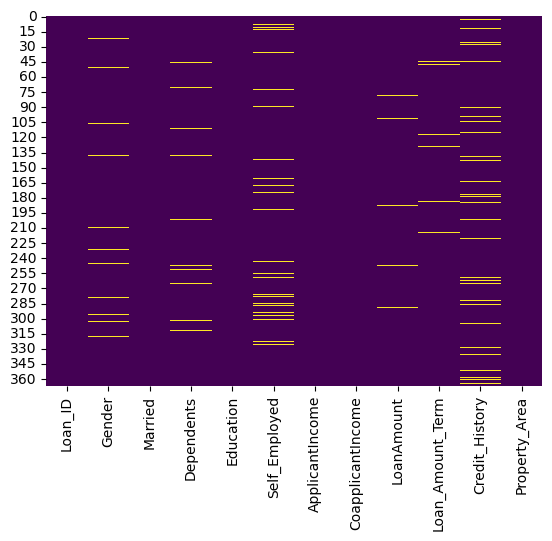

In [103]:
sns.heatmap(test_df.isna(),cmap='viridis',cbar=False)
plt.show()

In [105]:
test_df.isna().sum()   

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [107]:
test_df.isna().sum()/test_df.shape[0]*100  

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [109]:
num_df1 = test_df.select_dtypes(include="number")
cat_df1 = test_df.select_dtypes(include="object_")

In [111]:
print("Numerical columns are")
num_cols1= num_df1.columns.tolist()
print(num_cols1)

cat_cols1 = cat_df1.columns.tolist()
print("Categorical columns are")
print(cat_cols1)

Numerical columns are
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns are
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


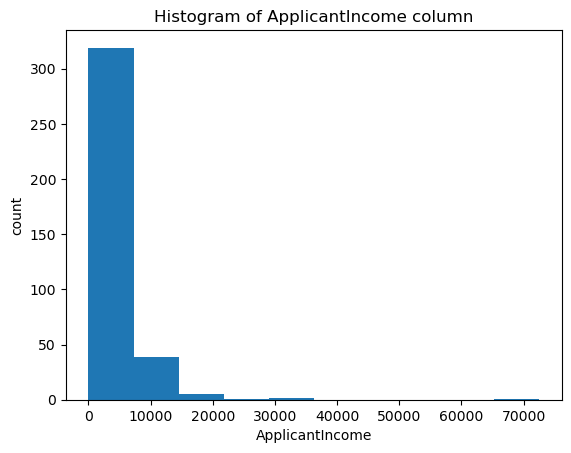

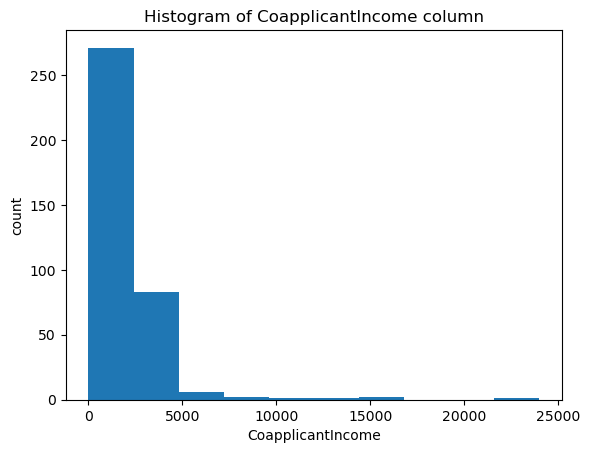

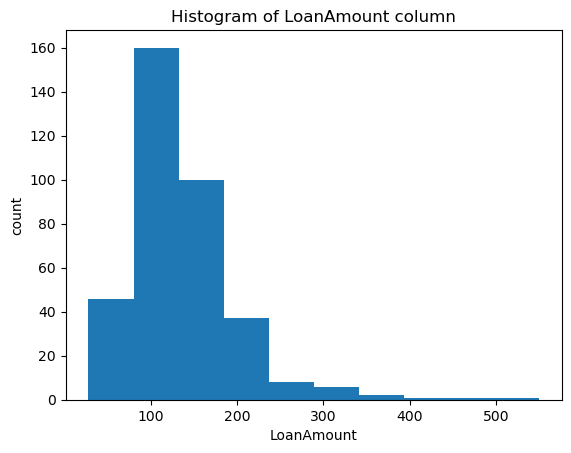

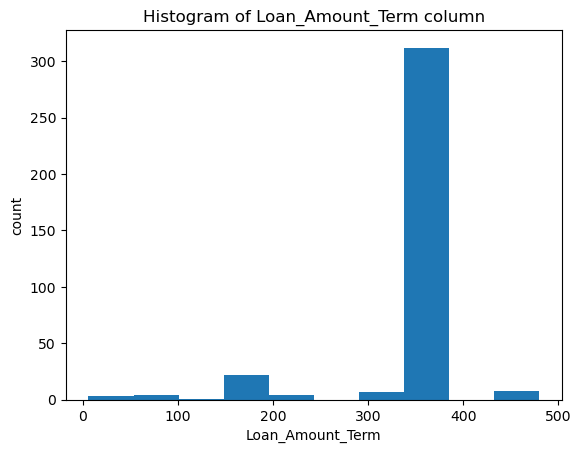

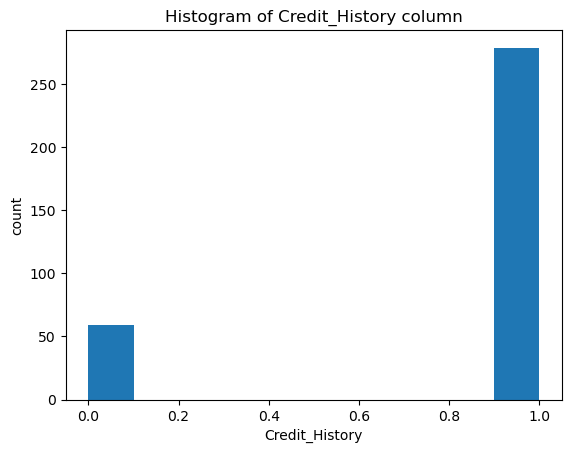

In [113]:
for col in num_cols1:
  plt.hist(num_df1[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [115]:
for col in num_cols1:
  num_df1[col] = num_df1[col].fillna(num_df1[col].median())

In [117]:
num_df1.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [118]:
for col in cat_cols1:
    cat_df1[col] = cat_df1[col].fillna(cat_df1[col].mode()[0])

In [121]:
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [123]:
test_df = pd.concat([num_df1, cat_df1], axis=1)

In [125]:
test_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [127]:
print(test_df["Dependents"].unique())

['0' '1' '2' '3+']


In [129]:
test_df["Dependents"].replace('3+',3,inplace=True)
test_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3,Not Graduate,Yes,Urban
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural
366,9200,0,98.0,180.0,1.0,LP002989,Male,No,0,Graduate,Yes,Rural


In [131]:
dup_cols1 = test_df.columns.duplicated()
dup_cols1.sum()

0

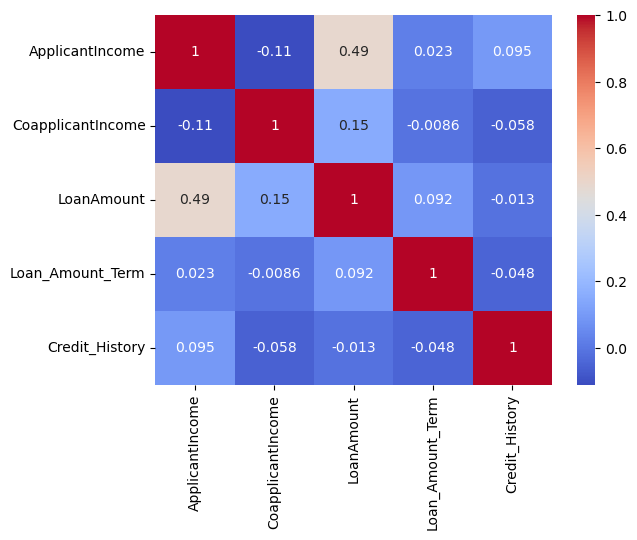

In [133]:
sns.heatmap(num_df1.corr(), annot=True, cmap='coolwarm')
plt.show()

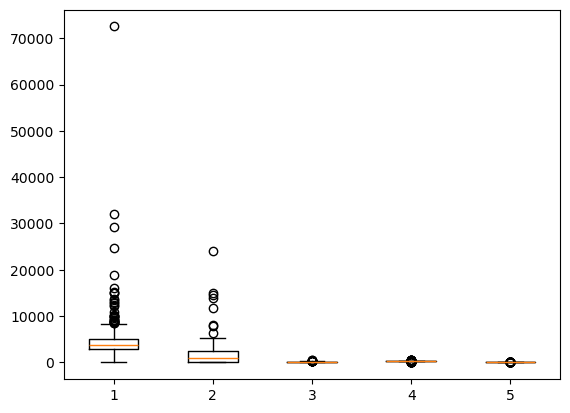

In [134]:
plt.boxplot(num_df1)
plt.show()

In [137]:
def remove_outliers(test_df, column_name):
    q1 = test_df[column_name].quantile(0.25)
    q3 = test_df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    test_df[column_name] = test_df[column_name].clip(upper=upper_bound)
    test_df[column_name] = test_df[column_name].clip(lower=lower_bound)
    return test_df[column_name]

In [139]:
for col in num_cols1:
  num_df1[col] = remove_outliers(num_df1, col)

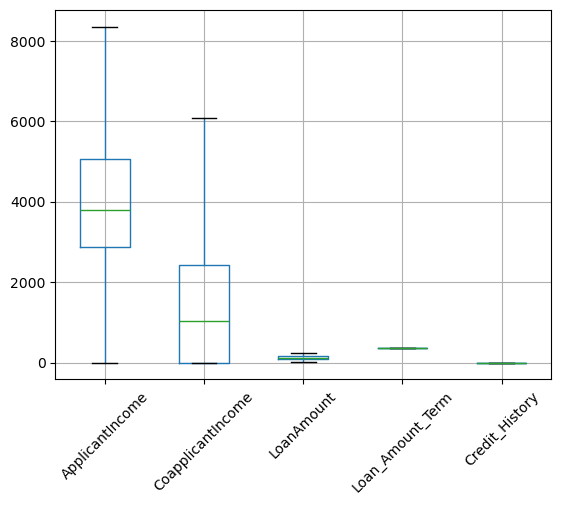

In [141]:
num_df1.boxplot()
plt.xticks(rotation=45)
plt.show()

In [144]:
test_df=pd.get_dummies(test_df,columns=['Gender','Married','Education','Self_Employed','Property_Area'],dtype=int,drop_first=True)
test_df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,LP001015,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,LP001022,1,1,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,LP001031,2,1,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,LP001035,2,1,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,LP001051,0,1,0,1,0,0,1


In [146]:
std_scaler = StandardScaler()
test_df["LoanAmount"] = std_scaler.fit_transform(test_df[["LoanAmount"]])
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,-0.426780,360.0,1.0,LP001015,0,1,1,0,0,0,1
1,3076,1500,-0.163953,360.0,1.0,LP001022,1,1,1,0,0,0,1
2,5000,1800,1.183033,360.0,1.0,LP001031,2,1,1,0,0,0,1
3,2340,2546,-0.591047,360.0,1.0,LP001035,2,1,1,0,0,0,1
4,3276,0,-0.952433,360.0,1.0,LP001051,0,1,0,1,0,0,1


In [148]:
min_max_scalar = MinMaxScaler(feature_range=(0,1))
test_df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']]=min_max_scalar.fit_transform(test_df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']])
test_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,-0.426780,0.746835,1.0,LP001015,0,1,1,0,0,0,1
1,0.042411,0.062500,-0.163953,0.746835,1.0,LP001022,1,1,1,0,0,0,1
2,0.068938,0.075000,1.183033,0.746835,1.0,LP001031,2,1,1,0,0,0,1
3,0.032263,0.106083,-0.591047,0.746835,1.0,LP001035,2,1,1,0,0,0,1
4,0.045168,0.000000,-0.952433,0.746835,1.0,LP001051,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,-0.377500,0.746835,1.0,LP002971,3,1,1,1,1,0,1
363,0.057329,0.029542,-0.344647,0.746835,1.0,LP002975,0,1,1,0,0,0,1
364,0.044810,0.083042,-0.163953,0.746835,1.0,LP002980,0,1,0,0,0,1,0
365,0.068938,0.099708,0.361700,0.746835,1.0,LP002986,0,1,1,0,0,0,0


In [150]:
X_test=test_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]

In [160]:
test_df['Loan_Status']=model.predict(X_test)

In [162]:
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.078865,0.000000,-0.426780,0.746835,1.0,LP001015,0,1,1,0,0,0,1,Y
1,0.042411,0.062500,-0.163953,0.746835,1.0,LP001022,1,1,1,0,0,0,1,Y
2,0.068938,0.075000,1.183033,0.746835,1.0,LP001031,2,1,1,0,0,0,1,Y
3,0.032263,0.106083,-0.591047,0.746835,1.0,LP001035,2,1,1,0,0,0,1,Y
4,0.045168,0.000000,-0.952433,0.746835,1.0,LP001051,0,1,0,1,0,0,1,Y


In [164]:
test_df[['Loan_ID','Loan_Status']].to_csv('loan_predictions.csv',index=False)